In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import seaborn
from os.path import join
%matplotlib inline

from PRmm.model import ReadersFixture
from PRmm.extras.clusterPlots import *
from PRmm.extras.activityPlots import *

from ipywidgets import *

fx_T2B = ReadersFixture.fromIniFile("fixtures.ini", "T2B")
fx_PoC = ReadersFixture.fromIniFile("fixtures.ini", "PoC")

In [2]:
# Huge difference here, what's going on?
# Why does POC look so much worse?
print len(fx_T2B.holeNumbersWithAlignments)
print len(fx_PoC.holeNumbersWithAlignments)

4583
2351


In [3]:
print len(fx_T2B.holeNumbers)
print len(fx_PoC.holeNumbers)

65536
65536


In [4]:
commonHnsWithAlignment = sorted(set.intersection(set(fx_T2B.holeNumbersWithAlignments),
                                                 set(fx_PoC.holeNumbersWithAlignments)))

In [33]:
# find hns where the alignment starts late


#alnStartFrame = [ fx_T2B[hn].regions.alignment.startFrame for hn in commonHnsWithAlignment ]

#alnStartBase = [ fx_T2B.basF[hn] for hn in commonHnsWithAlignment ]

#regionTable = pd.DataFrame(fx_T2B.basF.regionsTable)

rt = pd.DataFrame(fx_PoC.basF.parts[0].regionTable)
lateStartHns = sorted(set.intersection(set(rt[(rt.regionStart > 500) & (rt.regionType == 2)].holeNumber),
                                    set(commonHnsWithAlignment)))



12255661


None

None

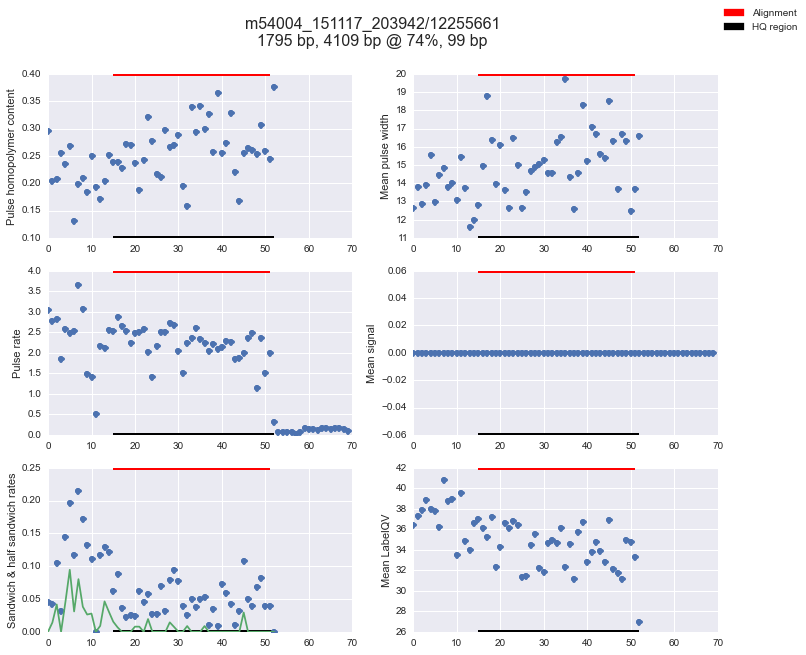

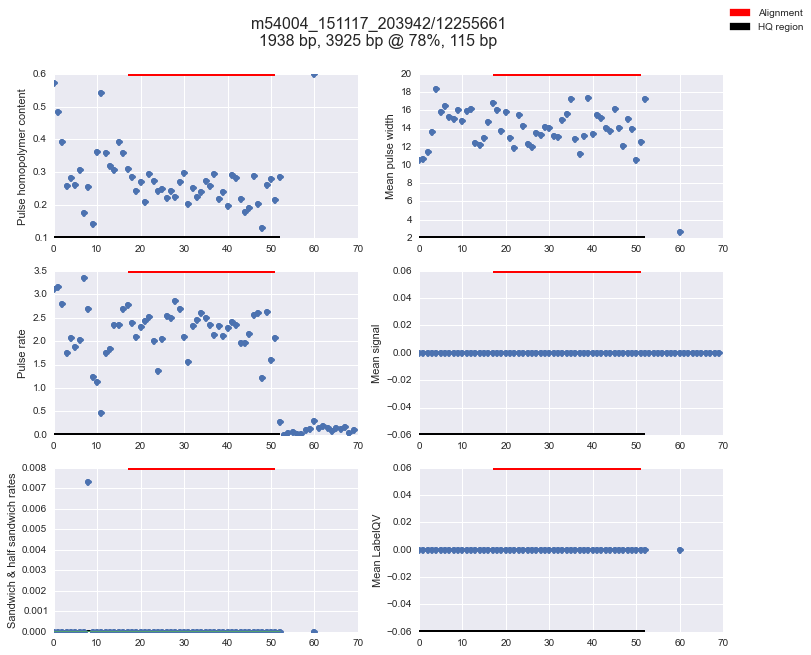

In [34]:
from ipywidgets import *
from IPython.display import display

def plotMetricsP(hnString):
    hn = int(hnString)
    print hn
    l = plotMetrics(fx_PoC[hn]);
    r = plotMetrics(fx_T2B[hn]);
    display(l, r)    


#hnW = Select(options=map(str, commonHnsWithAlignment))
hnW = Select(options=map(str, lateStartHns))


interact(plotMetricsP, hnString=hnW)

In [ ]:
11534784